# Cohort Analysis: Evaluate Discount Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib.ticker as mtick
import datetime as dt
import numpy as np
import seaborn as sns

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

%matplotlib inline
pyoff.init_notebook_mode()

In [2]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'unicode_escape')
data.head()

Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office Supplies      Storage   
1   OFF-SU-10000618  Office Supplies     Supplies   
2  OFF-TEN-10001585  Office Supplies      Storage   
3   OFF-PA-10001492  Office Supplies        Paper   
4   FUR-FU-10003447        Furniture  Furnishings   

                  Product Name    Sales Quantity Discount   Profit  \
0          Tenex Lockers, Blue  408.300        2      0.0  106.140   
1     Acme Trimmer, High Speed  120.366        3      0.1   36.036   
2      Tenex Box, Single Width   66.120        4      0.0   29.640   
3  Enermax Note Cards, Premium   44.865        3      0.5  -26.055   
4   Eldon Light Bulb, Duo Pack  113.670        5      0.1   37.770   

   Shipping Cost  Order Priority  
0          35.46          Medium  
1           9.72          Medium  
2           8.17            High  
3           4.82            High  
4           4.70          Medium  

[5 rows x 24 columns]

In [3]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
data.duplicated().any()

False

In [6]:
data = data.drop_duplicates()
data.shape

(51290, 24)

# Exploratory Data Analysis

A. CUSTOMER PROFILE

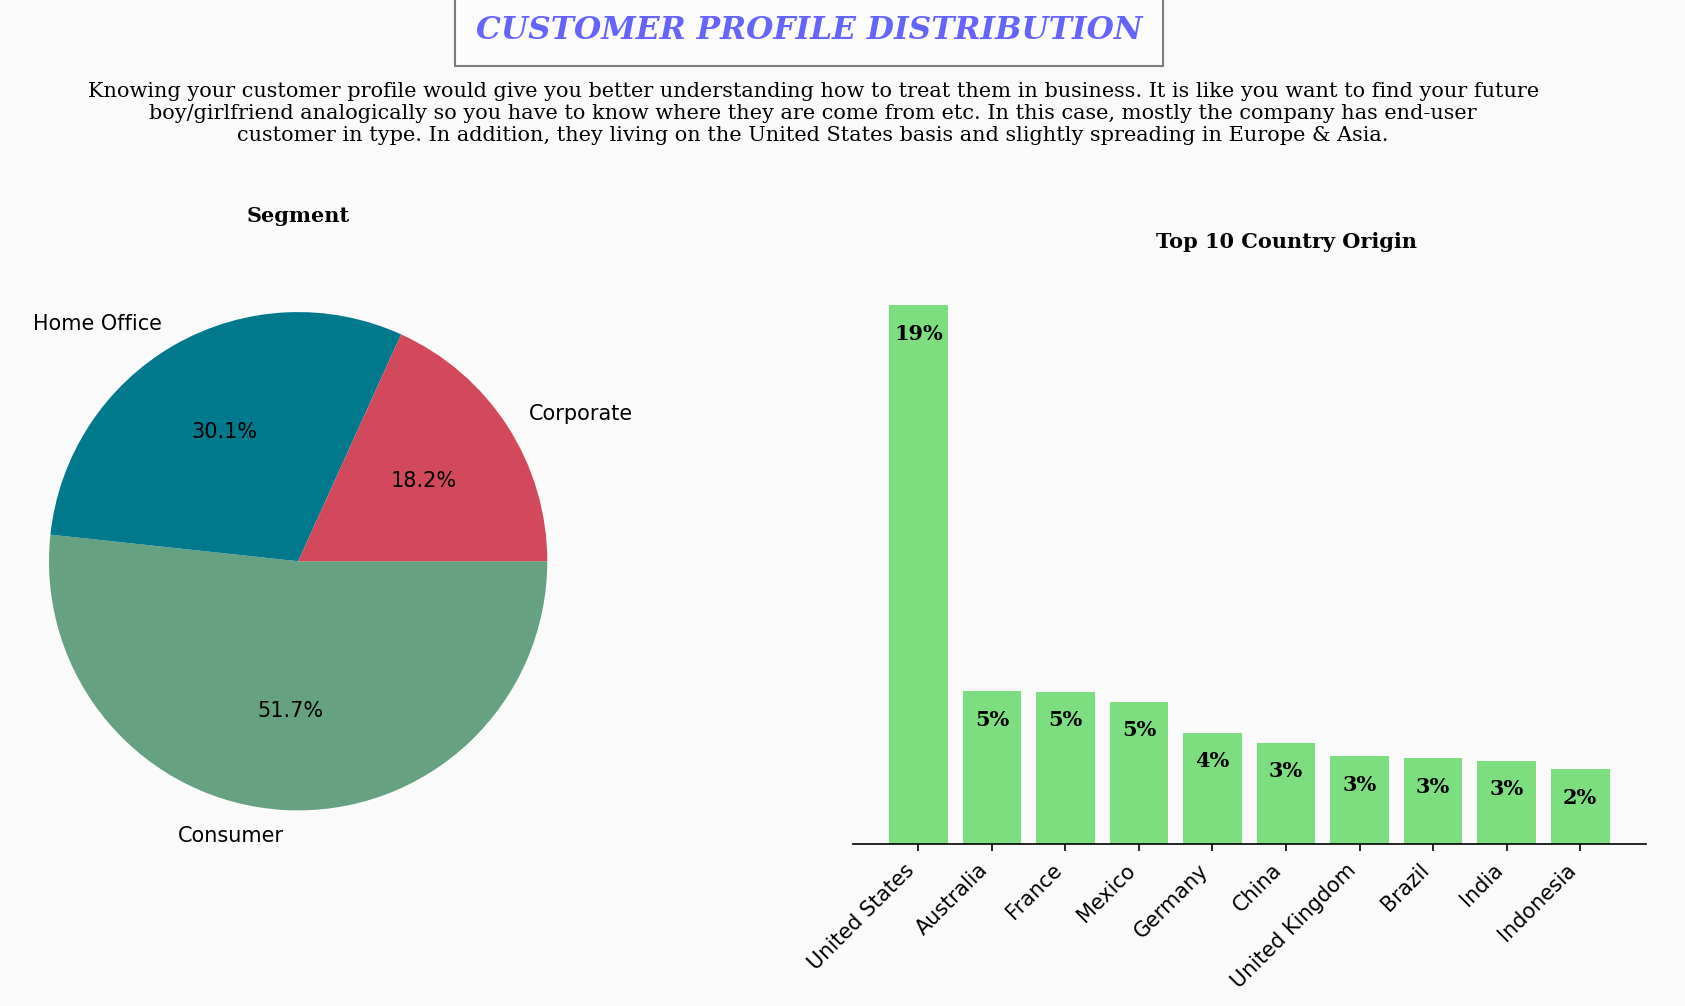

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), dpi = 150)
ax0 = ax[0]
ax1 = ax[1]

fig.patch.set_facecolor('#fafafa')

for s in ['top', 'right', 'left']:
    for i in range(0, 2):
        locals()[f'ax{i}'].spines[s].set_visible(False)
        locals()[f'ax{i}'].set_facecolor('white')
        
#by Segment
seg_data = data['Segment'].value_counts()
label = data['Segment'].unique()
#explode1 = [0.1, 0, 0, 1, 2.5]
ax0.pie(seg_data, autopct = '%1.1f%%', counterclock = False, radius = 1.1, labels = label, colors = ['#66a182', '#00798c', '#d1495b'])
ax0.text(0, 1.5, 'Segment', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', color = 'black', 
         ha = 'center')

#by Country
country_data = pd.DataFrame(data['Country'].value_counts())
country_data['percentage'] = country_data['Country'].apply(lambda x: round(x / sum(country_data['Country']) * 100, 2))
    #viz
ax1.bar(x = country_data[:10].index, height = country_data['percentage'][:10], color = '#01C408', alpha = 0.5)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(5))

plt.xticks(rotation=45, ha='right')
ax1.set_yticks([])
ax1.set_facecolor("#fafafa")

for i in np.arange(0, 11):
    ax1.annotate(f"{int(country_data.iloc[i, 1])}%", xy = (i, country_data.iloc[i, 1] - 1), 
                va = 'center', ha = 'center', fontsize = 10, fontweight = 'bold', fontfamily = 'serif',color = 'black')

ax1.text(5, 21.6, 'Top 10 Country Origin', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', color = 'black', 
         ha = 'center')

fig.text(0.38, 1.2, 'CUSTOMER PROFILE DISTRIBUTION', fontsize = 15, fontweight = 'bold', fontfamily = 'serif', color = 'blue',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', alpha = 0.6)
fig.text(0.53, 1.1, 'Knowing your customer profile would give you better understanding how to treat them in business. It is like you want to find your future\nboy/girlfriend analogically so you have to know where they are come from etc. In this case, mostly the company has end-user\ncustomer in type. In addition, they living on the United States basis and slightly spreading in Europe & Asia.', 
         fontsize = 10, fontweight = 'light', fontfamily = 'serif', color = 'black', ha='center', va='center')

plt.show()
#plt.savefig('1. Customer Distribution.png', dpi = 500, bbox_inches = 'tight')

B. Sales and Profit Performance

In [8]:
#change data datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['OrderYearMonth'] = pd.to_datetime(data['Order Date']).dt.to_period('M')
data['OrderYearMonth'] = pd.to_datetime(data['OrderYearMonth'].astype(str))

#sales growth
sales_yearmonth = data.groupby(data['OrderYearMonth'])['Sales'].sum().reset_index()
sales_yearmonth['Sales'] = round(sales_yearmonth['Sales'] / 1000, 2)

year_growth = sales_yearmonth.copy()
year_growth['OrderYearMonth'] = pd.to_datetime(year_growth['OrderYearMonth']).dt.year
year_salesGrowth = year_growth.groupby('OrderYearMonth')['Sales'].sum().reset_index()
year_salesGrowth['Growth'] = round(year_salesGrowth['Sales'].pct_change() * 100, 2)
year_salesGrowth['Growth']

0      NaN
1    18.50
2    27.20
3    26.25
Name: Growth, dtype: float64

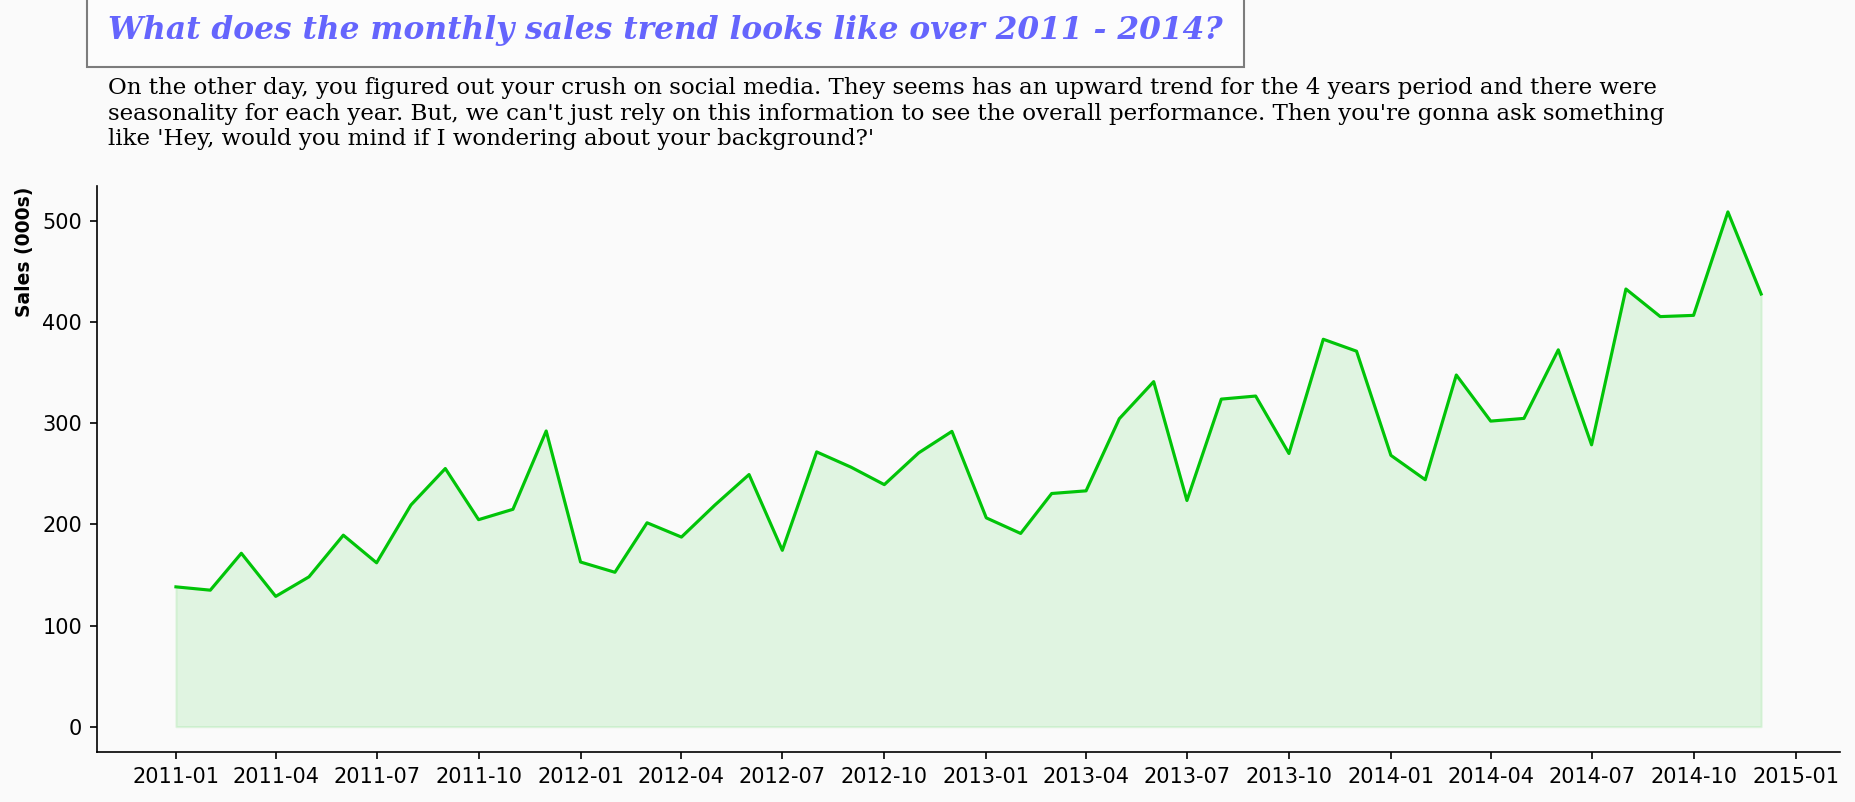

In [9]:
green = '#01C408'
red = '#F31726'

fmt_3_month = dates.MonthLocator(interval = 3)

fig, ax = plt.subplots(1, 1, figsize = (15, 5), dpi = 150, facecolor = "#fafafa")
sns.lineplot(x = sales_yearmonth['OrderYearMonth'], y = sales_yearmonth['Sales'], ax = ax, color = green)

ax.set_facecolor("#fafafa")
ax.fill_between(sales_yearmonth['OrderYearMonth'], sales_yearmonth['Sales'], color = green, zorder = 2, alpha = 0.1)

ax.set_ylabel('Sales (000s)', loc = 'top', fontsize = 9, fontweight = 'bold')
ax.set_xlabel('')
ax.xaxis.set_major_locator(fmt_3_month)
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.text('2010-11', 680, 'What does the monthly sales trend looks like over 2011 - 2014?', fontsize = 15, fontweight = 'bold', 
        fontfamily = 'serif', color = 'blue', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', 
        alpha = 0.6)
ax.text('2010-11', 575, "On the other day, you figured out your crush on social media. They seems has an upward trend for the 4 years period and there were\nseasonality for each year. But, we can't just rely on this information to see the overall performance. Then you're gonna ask something\nlike 'Hey, would you mind if I wondering about your background?'", fontsize = 11, 
        fontweight = 'light', fontfamily = 'serif', color = 'black')

plt.show()
#plt.savefig('2. Monthly Sales Trend.png', dpi = 500, bbox_inches = 'tight')

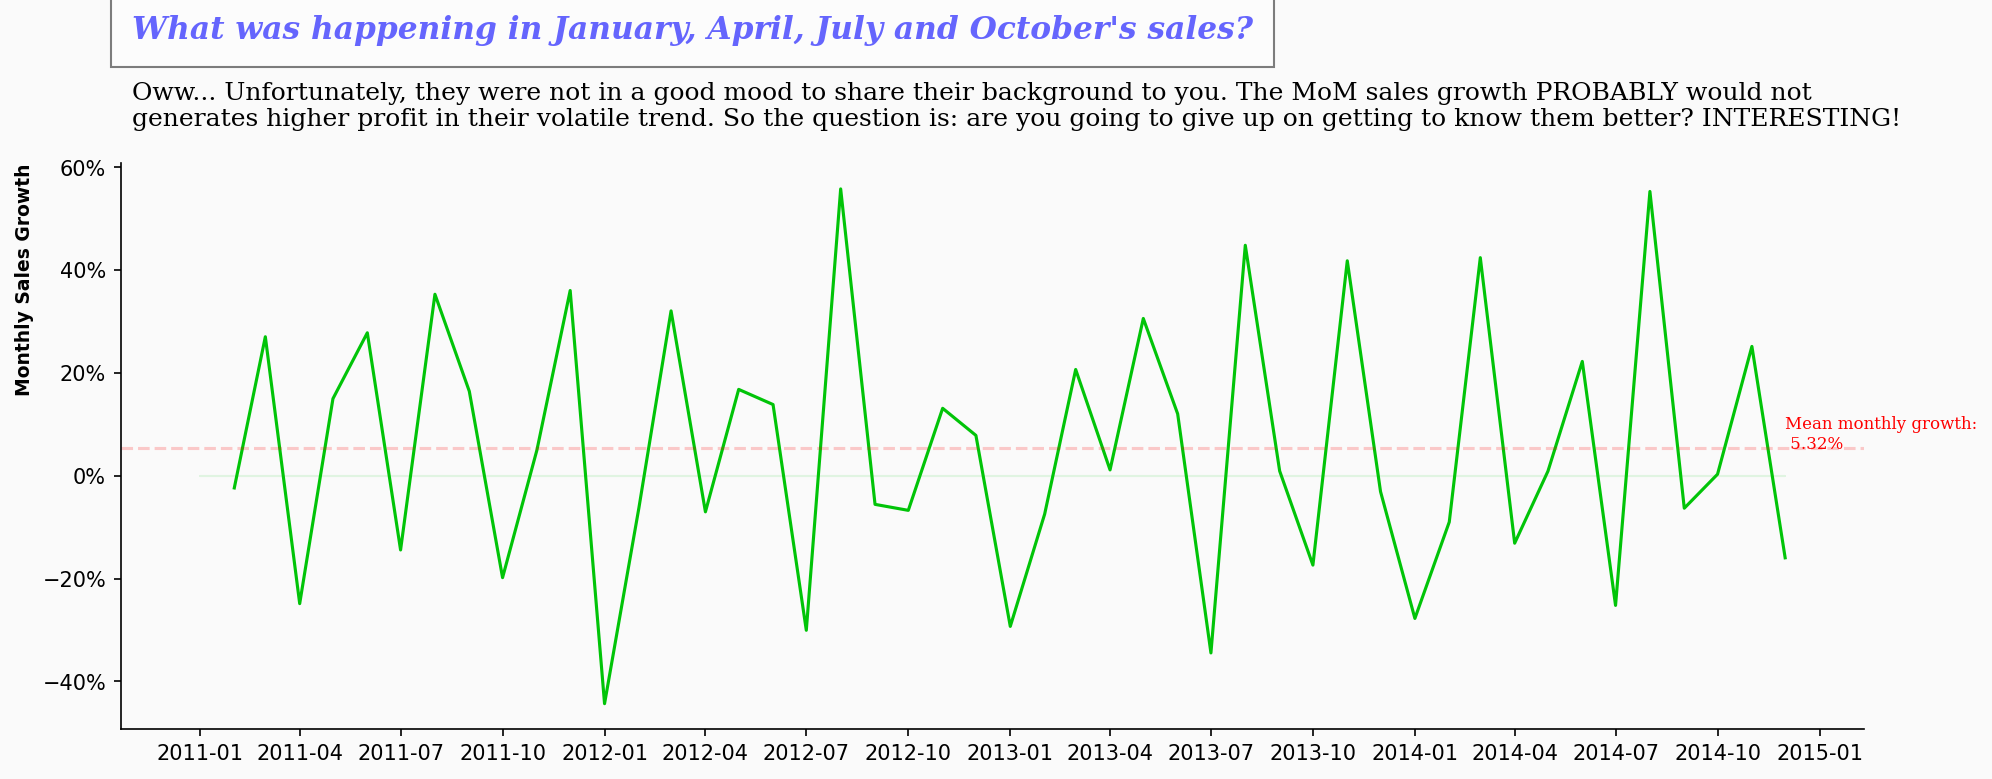

In [10]:
sales_yearmonth['Monthly Growth'] = sales_yearmonth['Sales'].pct_change()
sales_yearmonth['Monthly Growth'] = sales_yearmonth['Monthly Growth'] * 100

fig, ax = plt.subplots(1, 1, figsize = (15, 5), dpi = 150, facecolor = "#fafafa")
sns.lineplot(x = sales_yearmonth['OrderYearMonth'], y = sales_yearmonth['Monthly Growth'], ax = ax, color = '#01C408')
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_facecolor("#fafafa")
ax.fill_between(sales_yearmonth['OrderYearMonth'].values, 0, color = '#01C408', zorder = 2, alpha = 0.1)
    
mean_growth = sales_yearmonth['Monthly Growth'].mean()
ax.axhline(sales_yearmonth['Monthly Growth'].mean(), color = 'r', alpha = 0.2, ls='--')
#ax.text('2011-05-06', 87000, 'Walmart Aggregate Sales Trend\n(In Thousand Dollars)', fontsize = 25, fontweight = 'bold', 
#        fontfamily = 'serif', color = 'black', ha = 'center')
ax.set_ylabel('Monthly Sales Growth', loc = 'top', fontsize = 9, fontweight = 'bold')
ax.set_xlabel('')
ax.xaxis.set_major_locator(fmt_3_month)
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.text('2010-11', 85, "What was happening in January, April, July and October's sales?", fontsize = 15, 
        fontweight = 'bold', fontfamily = 'serif', color = 'blue', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, 
        style = 'italic', alpha = 0.6)
ax.text('2010-11', 68, "Oww... Unfortunately, they were not in a good mood to share their background to you. The MoM sales growth PROBABLY would not\ngenerates higher profit in their volatile trend. So the question is: are you going to give up on getting to know them better? INTERESTING!", fontsize = 12, 
        fontweight = 'light', fontfamily = 'serif', color = 'black')
ax.text(sales_yearmonth['OrderYearMonth'].max(), mean_growth, f"Mean monthly growth:\n {round(mean_growth, 2)}%", fontsize = 8, 
        fontweight = 'light', fontfamily = 'serif', color = 'red')

plt.show()
#plt.savefig('3. MoM Sales Trend Growth.png', dpi=500, bbox_inches='tight')
#Does user activity decreasing in that time as well?

<ipython-input-11-450e9338b6d8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



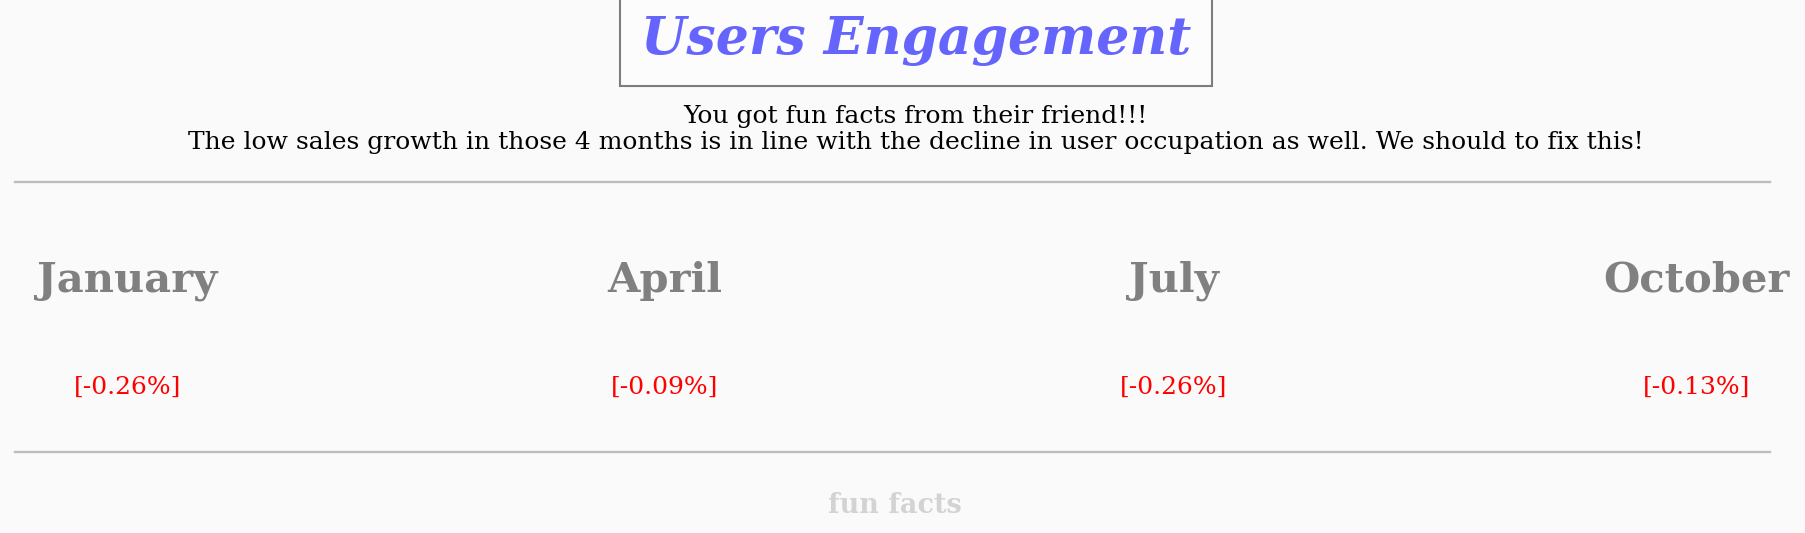

In [11]:
active_customer = data.groupby(['OrderYearMonth'])['Customer ID'].nunique().reset_index()
active_customer['Customer Active Growth'] =  active_customer['Customer ID'].pct_change()

why_sales_decrease = active_customer[(active_customer['OrderYearMonth'].dt.month == 1) | \
                                     (active_customer['OrderYearMonth'].dt.month == 4) | \
                (active_customer['OrderYearMonth'].dt.month == 7) | (active_customer['OrderYearMonth'].dt.month == 10)]
why_sales_decrease['OrderYearMonth'] = pd.to_datetime(why_sales_decrease['OrderYearMonth'].astype(str)).dt.month
month_decrease = why_sales_decrease.groupby('OrderYearMonth')['Customer Active Growth'].mean().reset_index()

month_decrease['OrderYearMonth'] = month_decrease['OrderYearMonth'].apply(lambda x: 'January' if x == 1 else 'April' if x == 4 else 'July' if x == 7 else 'October')

#reference code
#https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population

fig = plt.figure(figsize = (6,3),dpi = 150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace = 0.2, hspace = 0.4)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

ax0.text(1.13, 1.1, "Users Engagement", color='blue', fontsize = 25, fontweight = 'bold', fontfamily = 'serif', ha = 'center',
        bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', alpha = 0.6)
ax0.text(1.1,-0.25, "fun facts", color = 'lightgray', fontsize = 13, fontweight = 'bold', fontfamily = 'serif', ha = 'center')

ax0.text(1.13, 0.82, "You got fun facts from their friend!!!\nThe low sales growth in those 4 months is in line with the decline in user occupation as well. We should to fix this!", fontsize = 12, 
        fontweight = 'light', fontfamily = 'serif', color = 'black', ha = 'center')

ax0.text(0, 0.4, "January", color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'serif', ha = 'center')
ax0.text(0, 0.1, f"[{round(month_decrease.loc[0, 'Customer Active Growth'], 2)}%]", color = 'red', fontsize = 12, fontfamily = 'serif', 
         ha = 'center')

ax0.text(0.77, 0.4, "April", color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'serif', ha = 'center')
ax0.text(0.77, 0.1, f"[{round(month_decrease.loc[1, 'Customer Active Growth'], 2)}%]", color = 'red', fontsize = 12, fontfamily = 'serif', 
         ha = 'center')

ax0.text(1.5, 0.4, "July", color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'serif', ha = 'center')
ax0.text(1.5, 0.1, f"[{round(month_decrease.loc[2, 'Customer Active Growth'], 2)}%]", color = 'red', fontsize = 12, fontfamily = 'serif', 
         ha = 'center')

ax0.text(2.25, 0.4, "October", color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'serif', ha = 'center')
ax0.text(2.25, 0.1, f"[{round(month_decrease.loc[3, 'Customer Active Growth'], 2)}%]", color = 'red', fontsize = 12, fontfamily = 'serif', 
         ha = 'center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis = 'both',length = 0)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
import matplotlib.lines as lines
l1 = lines.Line2D([0, 1.95], [0.67, 0.67], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])
l2 = lines.Line2D([0, 1.95], [0.07, 0.07], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l2])

plt.show()
#plt.savefig('4. Users Engagement.png', dpi=500, bbox_inches='tight')

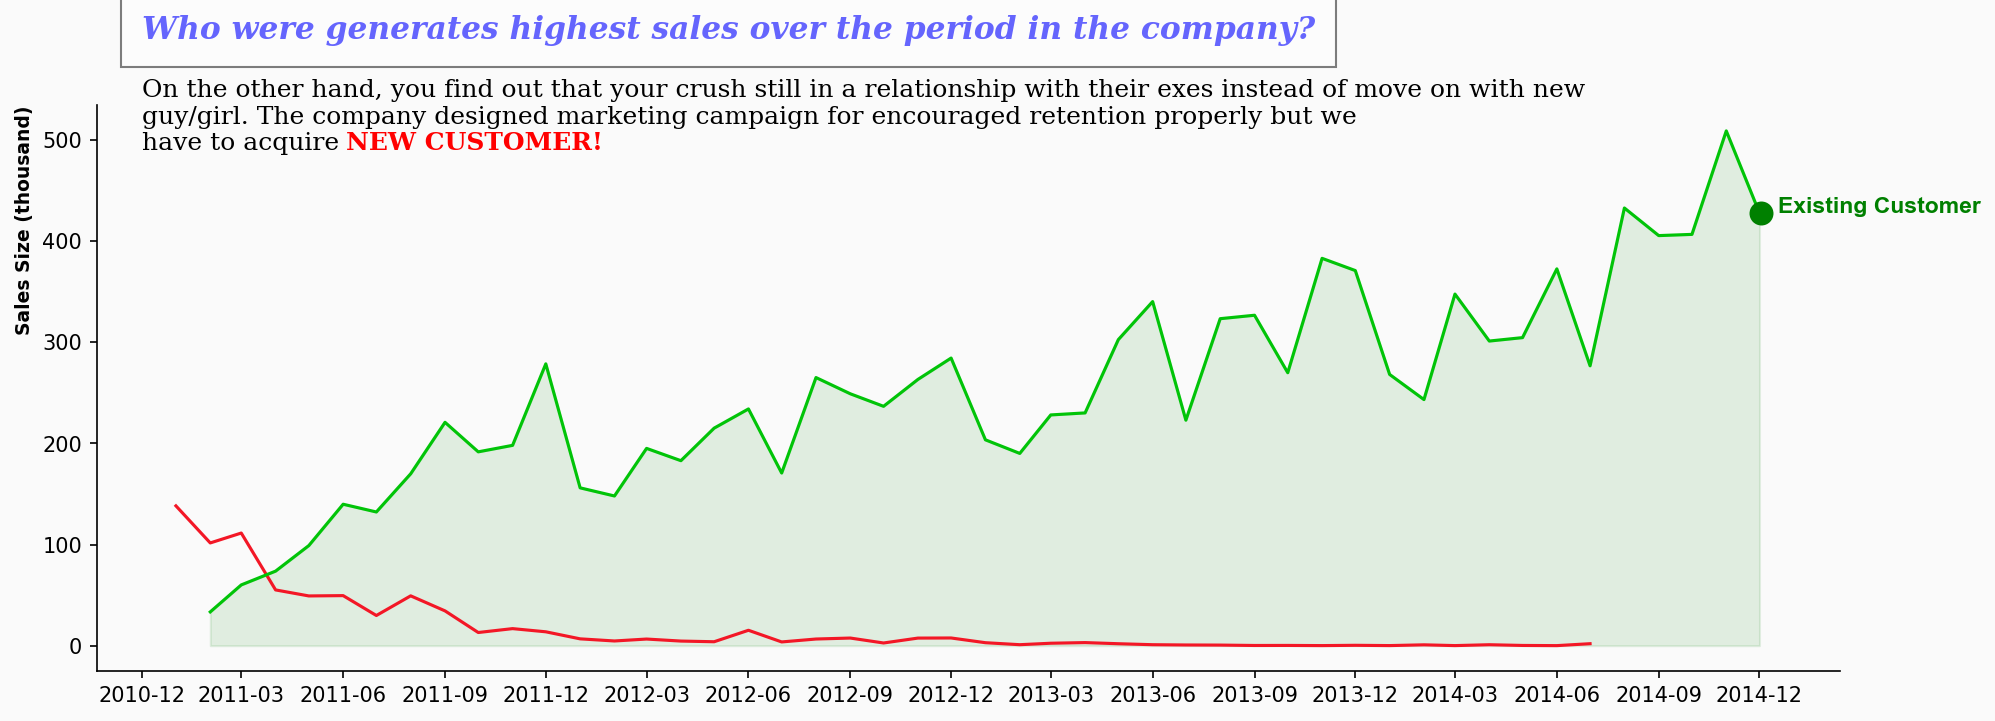

In [12]:
min_order_date = data.groupby(['Customer ID'])[['OrderYearMonth']].min().reset_index()
min_order_date.columns = ['Customer ID', 'MinOrderDate']

data = pd.merge(data, min_order_date, on = 'Customer ID')

data['Customer Type'] = 'New'
data.loc[data['OrderYearMonth' ] > data['MinOrderDate'], 'Customer Type'] = 'Existing'

customer_type = data.groupby(['OrderYearMonth', 'Customer Type'])['Sales'].sum().reset_index()
customer_type['Sales'] = round(customer_type['Sales'] / 1000, 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 5), dpi = 150, facecolor = "#fafafa")
sns.lineplot(data = customer_type, x = 'OrderYearMonth',
             y = customer_type[customer_type['Customer Type'] == 'New']['Sales'], ax = ax, color = '#F31726')
sns.lineplot(data = customer_type, x = 'OrderYearMonth', 
             y = customer_type[customer_type['Customer Type'] == 'Existing']['Sales'], ax = ax, color = '#01C408')

ax.set_facecolor("#fafafa")
ax.fill_between(customer_type[customer_type['Customer Type'] == 'Existing']['OrderYearMonth'], 
                customer_type[customer_type['Customer Type'] == 'Existing']['Sales'], 
                color = 'green', zorder = 2, alpha = 0.1)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()
ax.plot(Xend - 70, list(customer_type[customer_type['Customer Type'] == 'Existing']['Sales'])[-1], 'ko', markersize = 10, 
        fillstyle = 'full',color = 'green', markeredgewidth = 1.5)
ax.text(Xend - 55, list(customer_type[customer_type['Customer Type'] == 'Existing']['Sales'])[-1], 'Existing Customer', 
        color = 'green', fontfamily = 'arial', fontweight = 'bold', fontsize = 11, rotation = 0)


for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Sales Size (thousand)', loc = 'top', fontsize = 9, fontweight = 'bold')
ax.set_xlabel('')
ax.xaxis.set_major_locator(fmt_3_month)
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

ax.text('2010-12', 600, "Who were generates highest sales over the period in the company?", fontsize = 15, fontweight = 'bold', 
        fontfamily = 'serif', color = 'blue', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', 
        alpha = 0.6)
ax.text('2010-12', 490, "On the other hand, you find out that your crush still in a relationship with their exes instead of move on with new\nguy/girl. The company designed marketing campaign for encouraged retention properly but we\nhave to acquire", 
        fontsize = 12, fontweight = 'light', fontfamily = 'serif', color = 'black')
ax.text('2011-06-04', 490, 'NEW CUSTOMER!', fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'red')

plt.show()

#plt.savefig('6. Profit Size in Customer.png', dpi=500, bbox_inches='tight')

# Categorical Feature Distribution that Generate High Revenue

In [13]:
import plotly.express as px

all_country_sales = data.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(all_country_sales, locations = 'Country', color = 'Sales', locationmode = 'country names', 
                   color_continuous_scale = px.colors.sequential.Greens)

fig.update_layout(title = 'How sales different among country throughout the world?')
fig.show()

In [14]:
country_sales = data.groupby(['Country'])['Sales'].sum().reset_index().sort_values(ascending = False, by = 'Sales')

#top-5 highest sales country
us_sales = data[data['Country'] == 'United States'].groupby(['OrderYearMonth'])['Sales'].sum()
aus_sales = data[data['Country'] == 'Australia'].groupby(['OrderYearMonth'])['Sales'].sum()
fra_sales = data[data['Country'] == 'France'].groupby(['OrderYearMonth'])['Sales'].sum()
chi_sales = data[data['Country'] == 'China'].groupby(['OrderYearMonth'])['Sales'].sum()
ger_sales = data[data['Country'] == 'Germany'].groupby(['OrderYearMonth'])['Sales'].sum()

<ipython-input-15-2406d63c9979>:45: UserWarning:

FixedFormatter should only be used together with FixedLocator



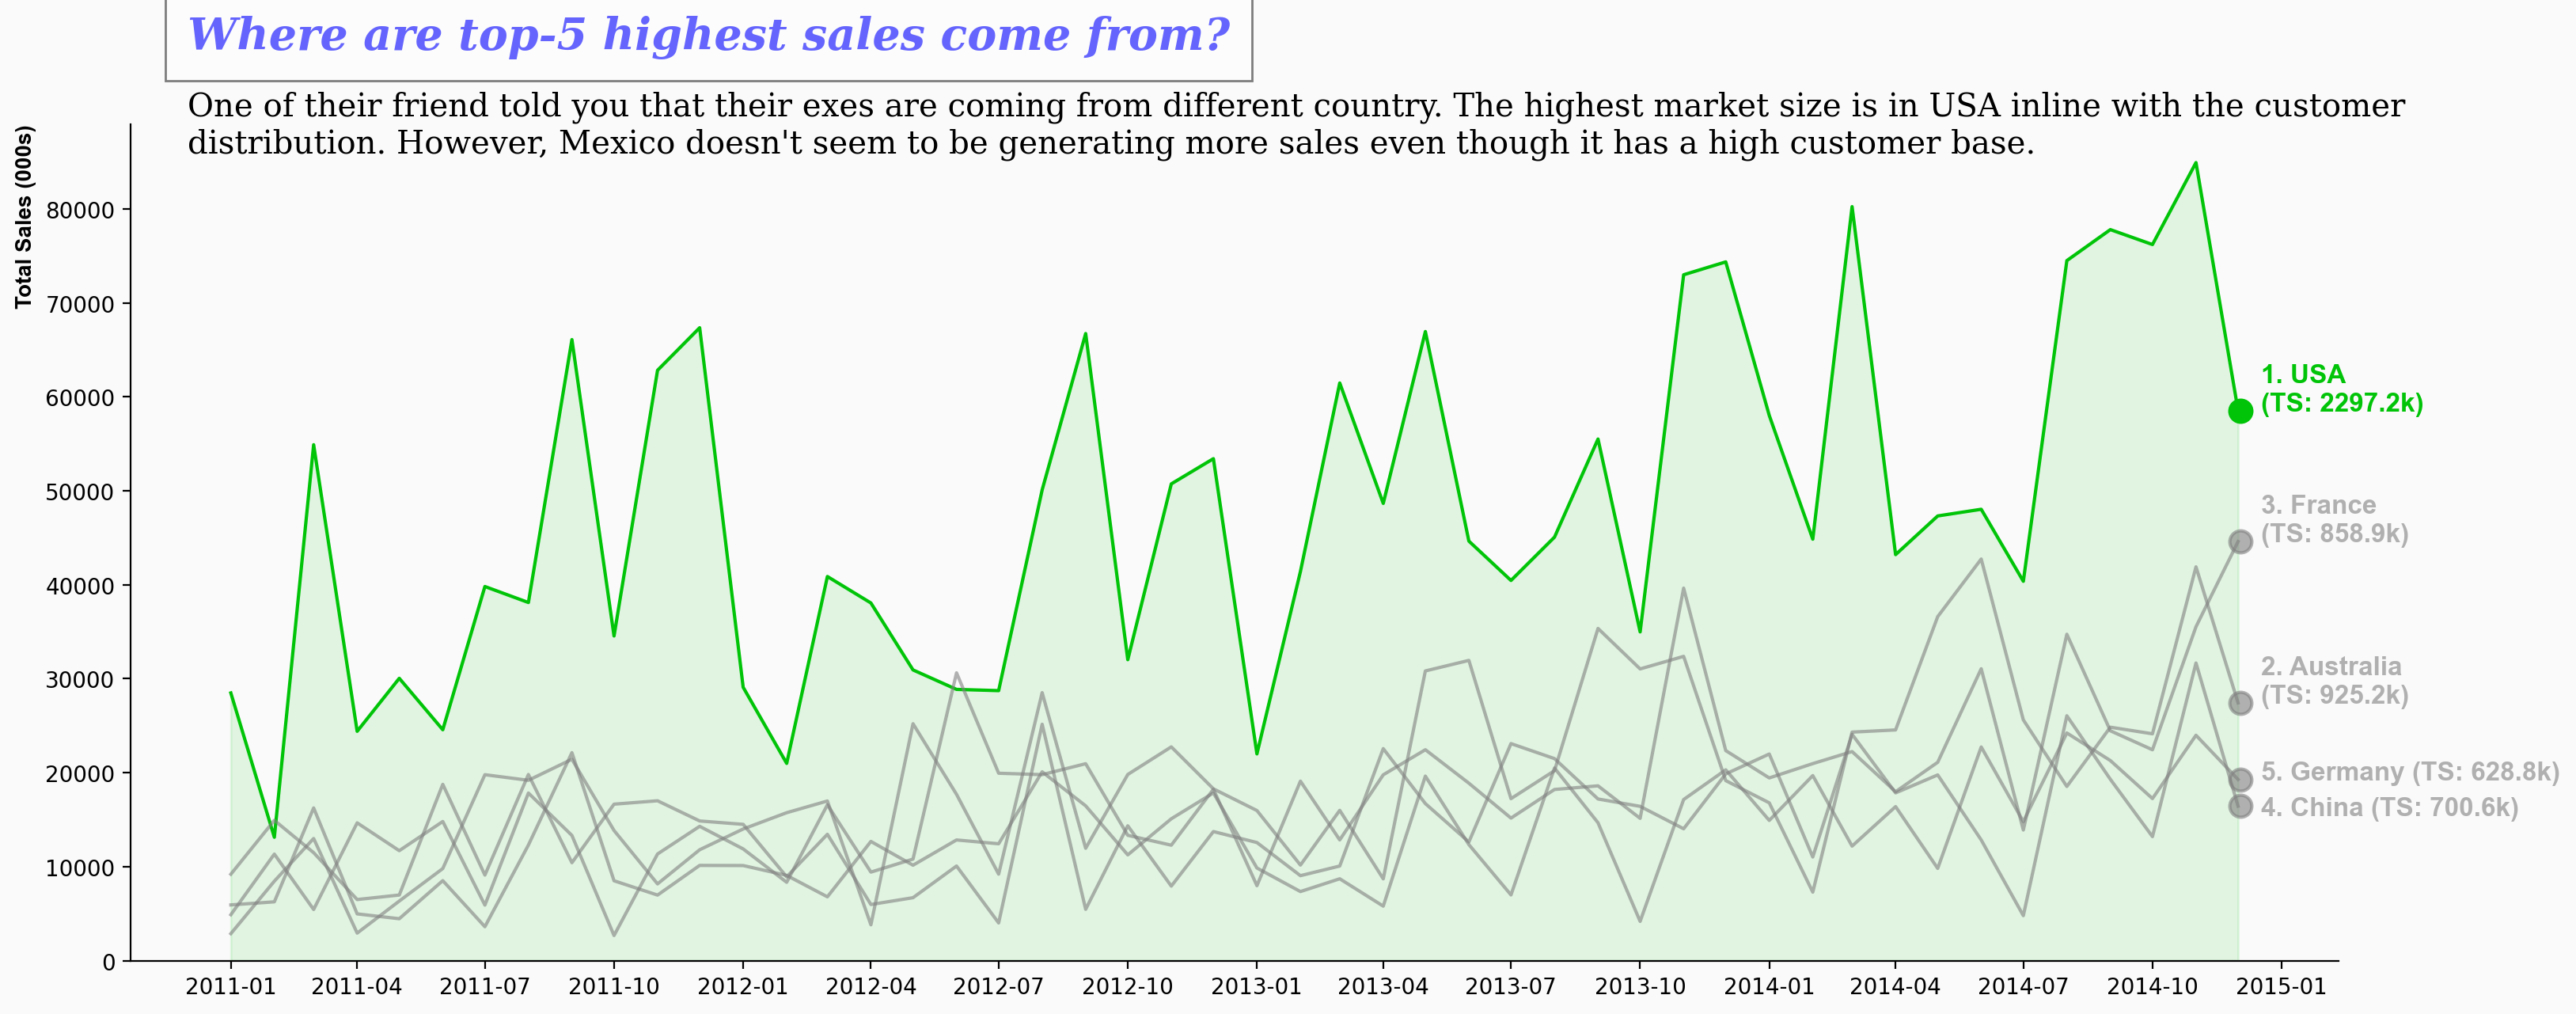

In [15]:
us = '#01C408'
others = 'gray'

fig, ax = plt.subplots(1, 1, figsize=(18, 7), dpi = 200, facecolor = "#fafafa")
ax.set_facecolor("#fafafa")

sales = [us_sales, aus_sales, fra_sales, chi_sales, ger_sales]
#us
sns.lineplot(ax = ax, data = sales[0], x = sales[0].index, y = sales[0], color = us)
#aus
sns.lineplot(ax = ax, data = sales[1], x = sales[1].index, y = sales[1], color = others, alpha = 0.6)
#fra
sns.lineplot(ax = ax, data = sales[2], x = sales[2].index, y = sales[2], color = others, alpha = 0.6)
#ita
sns.lineplot(ax = ax, data = sales[3], x = sales[3].index, y = sales[3], color = others, alpha = 0.6)
#spa
sns.lineplot(ax = ax, data = sales[4], x = sales[4].index, y = sales[4], color = others, alpha = 0.6)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_xlim([Xstart, Xend])
ax.set_ylim([0, Yend])

ax.fill_between(sales[0].index, sales[0], color = us, zorder = 2, alpha = 0.1)

ax.text(Xend - 55, us_sales[-1],f'1. USA\n(TS: {round(sales[0].sum() / 1000, 1)}k)', color = us, 
        fontfamily = 'arial', fontweight = 'bold', fontsize = 12, rotation = 0)
ax.text(Xend - 55, aus_sales[-1], f'2. Australia\n(TS: {round(sales[1].sum() / 1000, 1)}k)', color = others, fontfamily = 'arial', 
        fontweight = 'bold',fontsize = 12, rotation = 0, alpha = 0.6)
ax.text(Xend - 55, fra_sales[-1]+15, f'3. France\n(TS: {round(sales[2].sum() / 1000, 1)}k)', color = others, fontfamily = 'arial', 
        fontweight = 'bold', fontsize = 12, rotation = 0, alpha = 0.6)
ax.text(Xend - 55, chi_sales[-1] -1000, f'4. China (TS: {round(sales[3].sum() / 1000, 1)}k)', color = others, fontfamily = 'arial', 
        fontweight = 'bold', fontsize = 12, rotation = 0, alpha = 0.6)
ax.text(Xend - 55, ger_sales[-1], f'5. Germany (TS: {round(sales[4].sum() / 1000, 1)}k)', color = others, fontfamily = 'arial', 
        fontweight = 'bold', fontsize = 12, rotation = 0, alpha = 0.6)

ax.plot(Xend - 70, us_sales[-1], 'ko', markersize=10, fillstyle = 'full', color = us, markeredgewidth = 1.5)
ax.plot(Xend - 70, aus_sales[-1], 'ko', markersize=10, fillstyle = 'full', color = others, markeredgewidth = 1.5, alpha = 0.6)
ax.plot(Xend - 70, fra_sales[-1], 'ko', markersize=10, fillstyle = 'full', color = others, markeredgewidth = 1.5, alpha = 0.6)
ax.plot(Xend - 70, chi_sales[-1], 'ko', markersize=10, fillstyle = 'full', color = others, markeredgewidth = 1.5, alpha = 0.6)
ax.plot(Xend - 70, ger_sales[-1], 'ko', markersize=10, fillstyle = 'full', color = others, markeredgewidth = 1.5, alpha = 0.6)

ax.xaxis.set_major_locator(fmt_3_month), 
ax.set_xticklabels(labels = sales[0].index)
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

ax.set_xlabel('')
ax.set_ylabel("Total Sales (000s)", loc = 'top', fontfamily = 'arial', fontweight = 'bold')

ax.text('2010-12', 97000, "Where are top-5 highest sales come from?", fontsize = 20, fontweight = 'bold', fontfamily = 'serif', 
        color = 'blue', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', alpha = 0.6)
ax.text('2010-12', 86000, "One of their friend told you that their exes are coming from different country. The highest market size is in USA inline with the customer\ndistribution. However, Mexico doesn't seem to be generating more sales even though it has a high customer base.",
        fontsize = 14.5, fontweight = 'light', fontfamily = 'serif', color = 'black')

for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
    
    
plt.show()
#plt.savefig('7. Top-5 sales country.png', dpi=500, bbox_inches='tight')

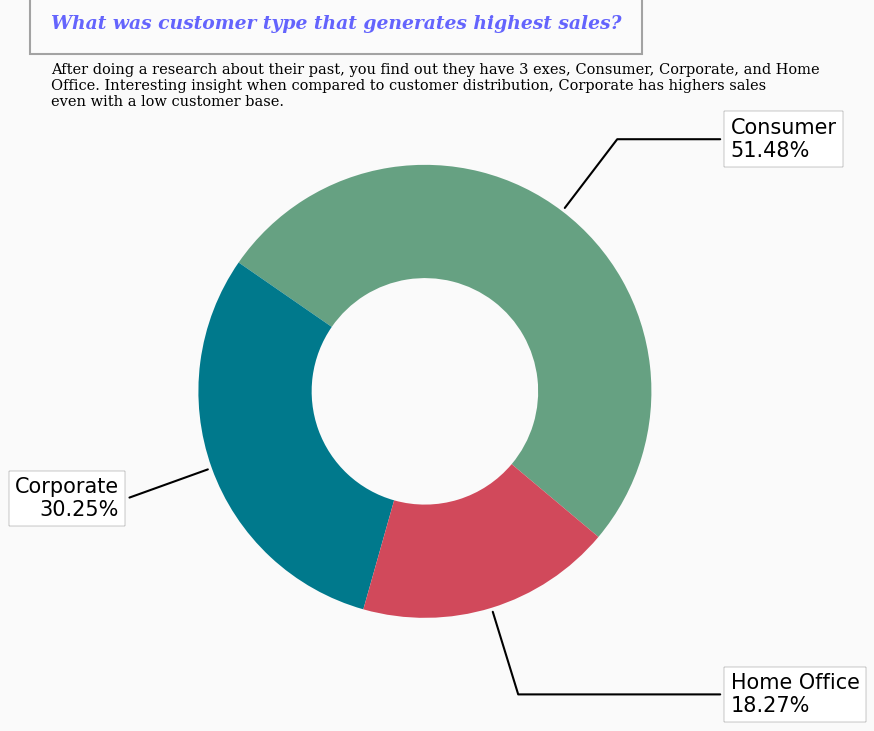

In [16]:
segment_sales = data.groupby('Segment')['Sales'].sum().reset_index()
segment_sales['Sales'] = round(segment_sales['Sales'] / segment_sales['Sales'].sum() * 100, 2)

fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#fafafa")
ax.set_facecolor('#fafafa')

recipe = segment_sales['Segment']
data_pie = segment_sales['Sales']

wedges, texts = ax.pie(data_pie, wedgeprops = dict(width = 0.5), startangle = -40, colors = ['#66a182', '#00798c', '#d1495b'])
bbox_props = dict(boxstyle = "square,pad = 0.3", fc = "w", ec = "k", lw = 0.1)
kw = dict(arrowprops = dict(arrowstyle = "-"),
          bbox = bbox_props, zorder = 0, va = "center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{recipe[i]}\n{data_pie[i]}%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.text(-1.65, 1.6, "What was customer type that generates highest sales?", fontsize = 9, 
        fontweight = 'bold', fontfamily = 'serif', color = 'blue', bbox = {'facecolor': 'white', 'alpha': 0.35, 'pad': 10}, 
        style = 'italic', alpha = 0.6)
ax.text(-1.65, 1.26, "After doing a research about their past, you find out they have 3 exes, Consumer, Corporate, and Home\nOffice. Interesting insight when compared to customer distribution, Corporate has highers sales\neven with a low customer base.",
        fontsize = 7, fontweight = 'light', fontfamily = 'serif', color = 'black')

plt.show()
#plt.savefig('8. Top-5 sales country.png', dpi=500, bbox_inches='tight')

In [17]:
segment_sales = data.groupby('Segment')['Sales'].sum().reset_index()
segment_sales['Sales'] = round(segment_sales['Sales'] / segment_sales['Sales'].sum() * 100, 2)
data_pie

0    51.48
1    30.25
2    18.27
Name: Sales, dtype: float64

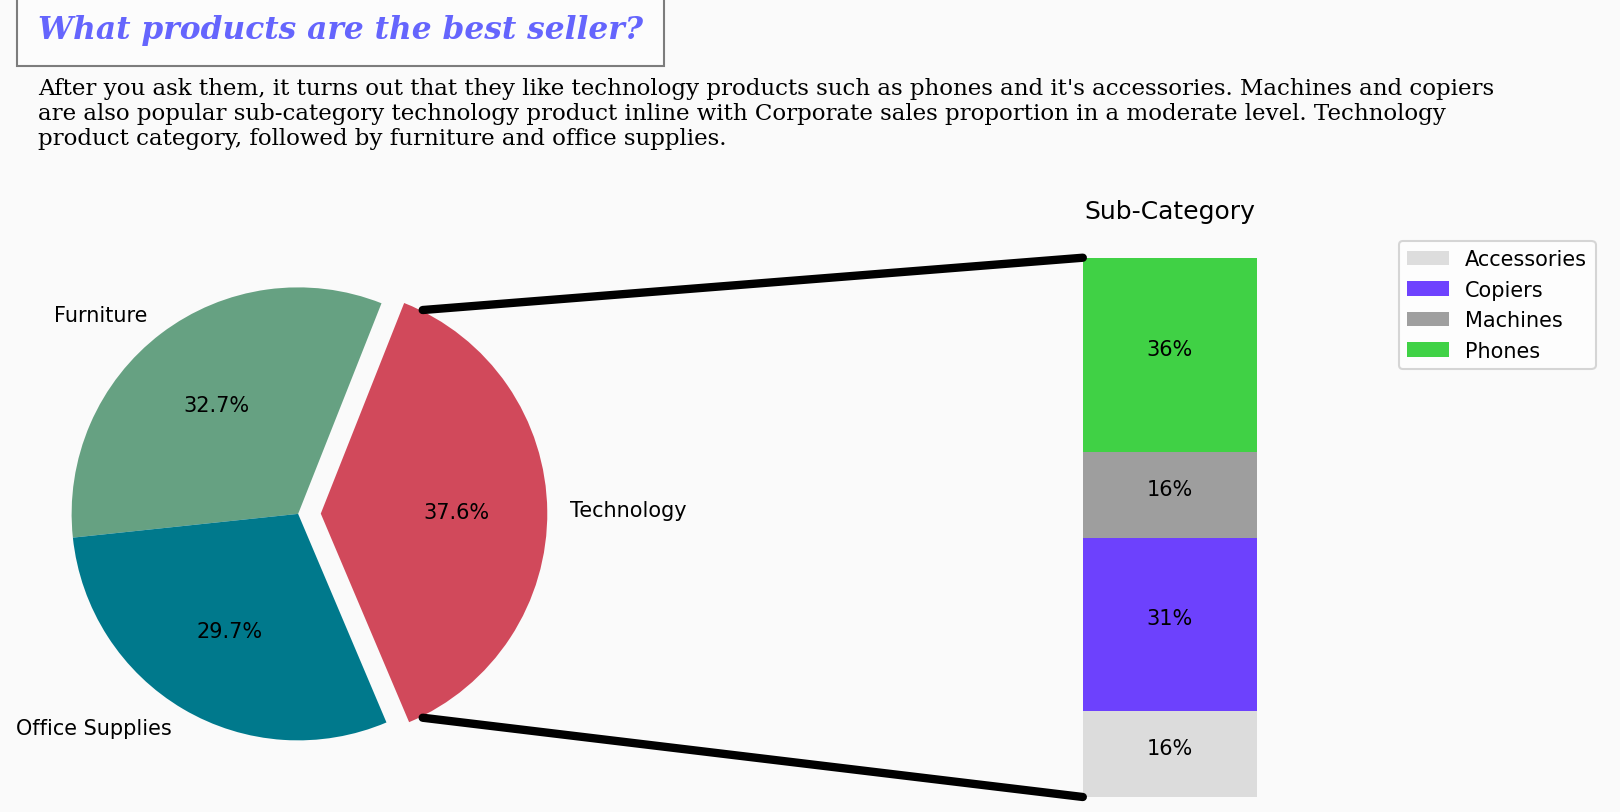

In [18]:
cat_sales = data.groupby('Category')['Sales'].sum().reset_index()
cat_sales['Sales'] = round(cat_sales['Sales'] / cat_sales['Sales'].sum(), 2)

sub_sales = data[data['Category'] == 'Technology'].groupby(['Sub-Category'])['Sales'].sum().reset_index()
sub_sales['Sales'] = round(sub_sales['Sales'] / sub_sales['Sales'].sum(), 2)

from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi = 150, facecolor = '#fafafa')
fig.subplots_adjust(wspace=0)


explode = [0, 0, 0.1]
angle = 180 * cat_sales['Sales'][2]

ax1.pie(cat_sales['Sales'], autopct = '%1.1f%%', startangle = angle,
        labels = cat_sales['Category'], explode = explode, colors = ['#66a182', '#00798c', '#d1495b'])

width = 10
xpos = 0
bottom = 0

colors = ['lightgray', '#3E03FF', 'gray', green]

for j in range(len(sub_sales['Sales'])):
    height = sub_sales['Sales'][j]
    ax2.bar(xpos, height, width, bottom = bottom, color = colors[j], alpha = 0.75)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
    
ax2.set_title('Sub-Category')
ax2.legend((list(sub_sales['Sub-Category'].unique())))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

bar_height = sum([item.get_height() for item in ax2.patches])

con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(0.55, 0.9), coordsB=ax1.transData)

con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(0.55, -0.9), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

ax1.text(-1.15, 2.1, "What products are the best seller?", fontsize = 15, fontweight = 'bold', 
         fontfamily = 'serif', color = 'blue', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', 
         alpha = 0.6)
ax1.text(-1.15, 1.63, "After you ask them, it turns out that they like technology products such as phones and it's accessories. Machines and copiers\nare also popular sub-category technology product inline with Corporate sales proportion in a moderate level. Technology\nproduct category, followed by furniture and office supplies.", 
         fontsize = 11, fontweight = 'light', fontfamily = 'serif', color = 'black')

plt.show()
#plt.savefig('9. Best-seller Products.png', dpi=500, bbox_inches='tight')

In [19]:
data_cohort = data.copy()

first_purchase = data_cohort.groupby('Customer ID')['Order Date'].min().reset_index()
first_purchase.columns = ['Customer ID', 'First Purchase Date']

data_cohort = pd.merge(data_cohort, first_purchase, on = 'Customer ID')
data_cohort.drop(['OrderYearMonth', 'MinOrderDate'], axis = 1, inplace = True)

data_cohort['Type of Order'] = np.where(data_cohort['Order Date'] != data_cohort['First Purchase Date'], 'Repeat', 'First')
data_cohort['Discount Dummy'] = data_cohort['Discount'].apply(lambda x: 1 if x > 0.5 else 0)

data_cohort.head()

Row ID      Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0   42433  AG-2011-2040 2011-01-01    6/1/2011  Standard Class    TB-11280   
1   47809  RS-2011-4710 2011-02-14  20-02-2011  Standard Class    TB-11280   
2   46608  ML-2012-2380 2012-08-14  16-08-2012    Second Class    TB-11280   
3   43734   CA-2014-240 2014-03-18  22-03-2014  Standard Class    TB-11280   
4   43730   CA-2014-240 2014-03-18  22-03-2014  Standard Class    TB-11280   

     Customer Name   Segment         City        State  ...   Sales  Quantity  \
0  Toby Braunhardt  Consumer  Constantine  Constantine  ...  408.30         2   
1  Toby Braunhardt  Consumer       Kaluga       Kaluga  ...   27.09         1   
2  Toby Braunhardt  Consumer       Bamako       Bamako  ...  301.77         1   
3  Toby Braunhardt  Consumer      Calgary      Alberta  ...  197.94         1   
4  Toby Braunhardt  Consumer      Calgary      Alberta  ...  134.16         1   

  Discount  Profit Shipping Cost Order Priority Customer Type  \
0      0.0  106.14         35.46         Medium           New   
1      0.0   13.53          2.03            Low      Existing   
2      0.0    9.03         48.77           High      Existing   
3      0.0   96.99         13.87         Medium      Existing   
4      0.0   12.06          9.17         Medium      Existing   

  First Purchase Date  Type of Order  Discount Dummy  
0          2011-01-01          First               0  
1          2011-01-01         Repeat               0  
2          2011-01-01         Repeat               0  
3          2011-01-01         Repeat               0  
4          2011-01-01         Repeat               0  

[5 rows x 28 columns]

<ipython-input-20-0afb1a3590e0>:98: UserWarning:

FixedFormatter should only be used together with FixedLocator



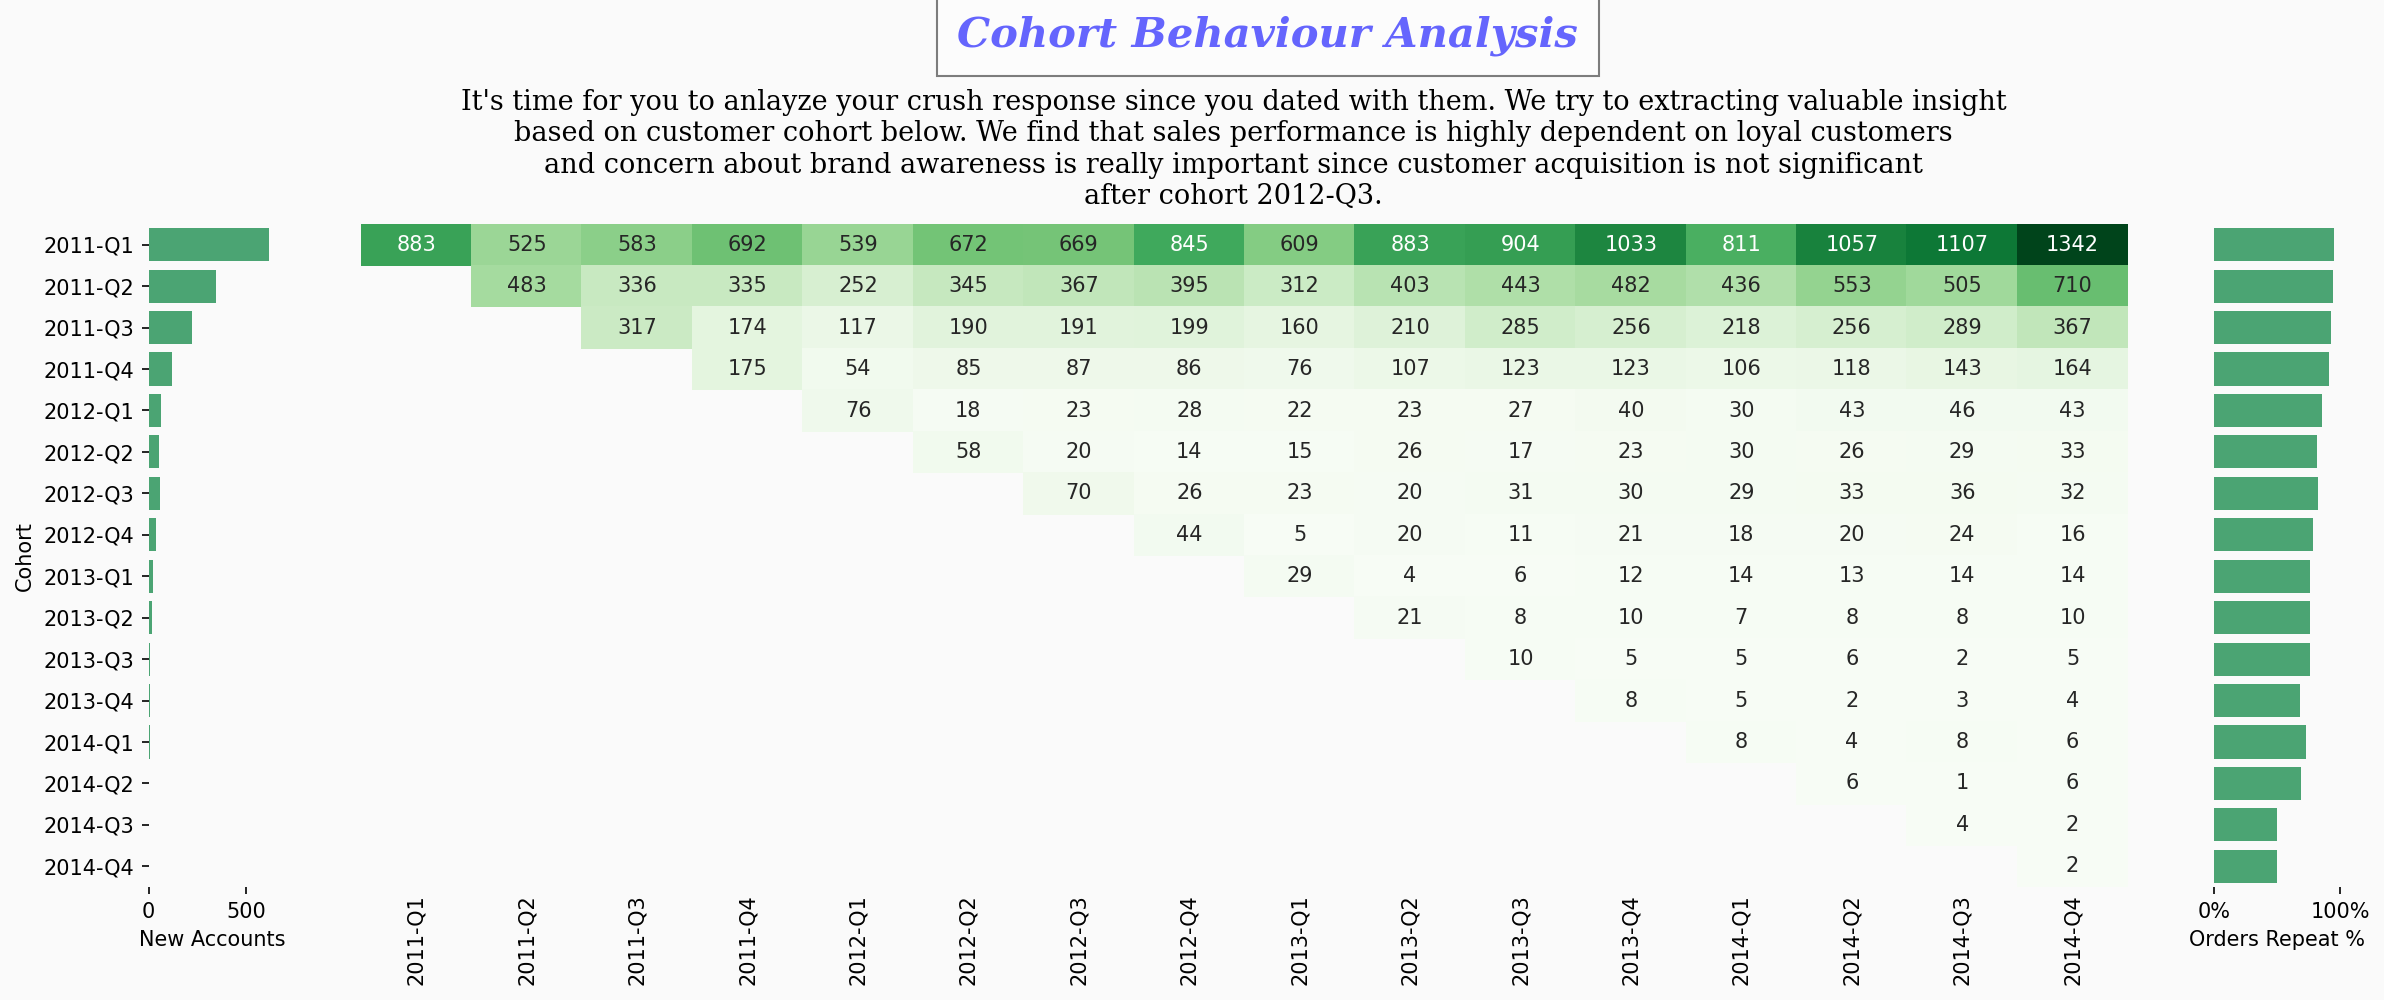

In [20]:
def get_quarterly(x):
    quarter = (x.month - 1) // 3 + 1
    return str(x.year) + '-Q' + str(quarter)

def generate_cohort(df, metric):
    cohorts = df.groupby(['Cohort', 'Order Period']).agg({
        'Order ID': pd.Series.nunique,
        'Quantity': sum,
        'Sales': sum
    })
    cohorts.columns = ['Number of Order', 'Number of Items Bought', 'Total Order Revenue']
    
    cohorts = cohorts[metric].unstack(0)
    return cohorts

def generate_repeat_percentages(df, metric):
    repeat_percent = df.groupby(['Cohort', 'Type of Order']).agg({
        'Order ID': pd.Series.nunique,
        'Quantity': sum,
        'Sales': sum
    }).unstack()

    repeat_percent = repeat_percent.stack().T.stack(level = 0).fillna(0)
    repeat_percent['Percentage Repeat'] = repeat_percent['Repeat'] / repeat_percent.sum(axis = 1)
    repeat_percent = repeat_percent.unstack(level = 0).iloc[:, -3:]
    
    repeat_percent.columns = ['Orders Repeat %', 'Items Bought Repeat %', 'Order Value Repeat %']

    if metric == 'Number of Order':
        selection = 'Orders Repeat %'
    if metric == 'Number of Items Bought':
        selection = 'Items Bought Repeat %'
    if metric == 'Total Order Revenue':
        selection = 'Order Value Repeat %'
    if not selection:
        raise NotImplementedError('No repeat figures for specified metric')

    repeat_percent = repeat_percent[selection].reset_index()
    
    return repeat_percent, selection

def generate_cohort_analysis(dataset, metric, customer_type = 'All', period_agg = 'quarterly', fig = True, size = 10):
    df = dataset.copy()
    if customer_type != 'All':
        df[df['Segment'] == customer_type].copy()
        
    if period_agg == 'quarterly':
        df['Cohort'] = df['First Purchase Date'].apply(lambda x: get_quarterly(x))
        df['Order Period'] = df['Order Date'].apply(lambda x: get_quarterly(x))
    elif period_agg == 'monthly':
        df['Cohort'] = df['First Purchase Date'].apply(lambda x: x.strftime('%Y-%m'))
        df['Order Period'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
    else:
        raise NotImplementedError(f'period_agg: {period_agg} is not implemented')
        
    cohorts = generate_cohort(df, metric)
    
    cohort_group_size = df.groupby('Cohort').agg({'Customer ID': pd.Series.nunique}).reset_index()
    cohort_group_size.columns = ['Cohort', 'New Accounts']
    
    repeat_percent, selection = generate_repeat_percentages(df, metric)
    
    if not fig:
        return (cohorts.T.join(cohort_group_size.set_index('Cohort')).fillna(0))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 7), gridspec_kw={'width_ratios': (1, 14, 1)}, facecolor = '#fafafa', dpi = 150)
    sns.despine(left = True, bottom = True, right = True)
    
    Accounts = sns.barplot(x = "New Accounts", y = 'Cohort', data = cohort_group_size, color = "#3CB371", ax = ax1)
    
    Heatmap = sns.heatmap(cohorts.T,
                          cmap = "Greens",
                          annot = True,
                          fmt = ".0f",
                          annot_kws = {"size": size},
                          cbar = False,
                          yticklabels = False,
                          ax = ax2)
    
    title = 'Cohort Behaviour Analysis for {}'.format(metric)
    #Heatmap.set_title(title, fontweight = 'bold', fontfamily = 'serif', fontsize = 14)
    Heatmap.yaxis.get_label().set_visible(False)
    Heatmap.set_xlabel('')
    ax2.tick_params(axis = u'both', which = u'both', length = 0)
    
    ax2.text(5.4, -4.3, "Cohort Behaviour Analysis", 
         fontsize = 20, fontweight = 'bold', fontfamily = 'serif', color = 'blue', 
             bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', alpha = 0.6)
    ax2.text(7.9, -1.8, "It's time for you to anlayze your crush response since you dated with them. We try to extracting valuable insight\nbased on customer cohort below. We find that sales performance is highly dependent on loyal customers\nand concern about brand awareness is really important since customer acquisition is not significant\nafter cohort 2012-Q3.", 
         fontsize = 13, fontweight = 'light', fontfamily = 'serif', color = 'black', ha='center', va='center')
    
    
    Repeats = sns.barplot(x = selection, y = 'Cohort', data = repeat_percent, color = "#3CB371", ax = ax3)
    Repeats.yaxis.get_label().set_visible(False)
    Repeats.set(yticklabels = [])
    Repeats.set(yticks = [])
    vals = Repeats.get_xticks()
    Repeats.set_xticklabels(['{:,.0f}%'.format(x * 100) for x in vals])
    
    ax1.set_facecolor('#fafafa')
    ax2.set_facecolor('#fafafa')
    ax3.set_facecolor('#fafafa')
    
    plt.tight_layout()
    #plt.savefig('10. Cohort Analaysis.png', dpi=500, bbox_inches='tight')
    
generate_cohort_analysis(data_cohort, 'Number of Order', customer_type = 'All', period_agg = 'quarterly', fig = True, 
                         size = 10)
#generate_cohort_analysis(data_cohort, 'Total Order Revenue', customer_type = 'All', period_agg = 'quarterly', fig = True, 
#                         size = 10)

<ipython-input-21-d44cf72898e8>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



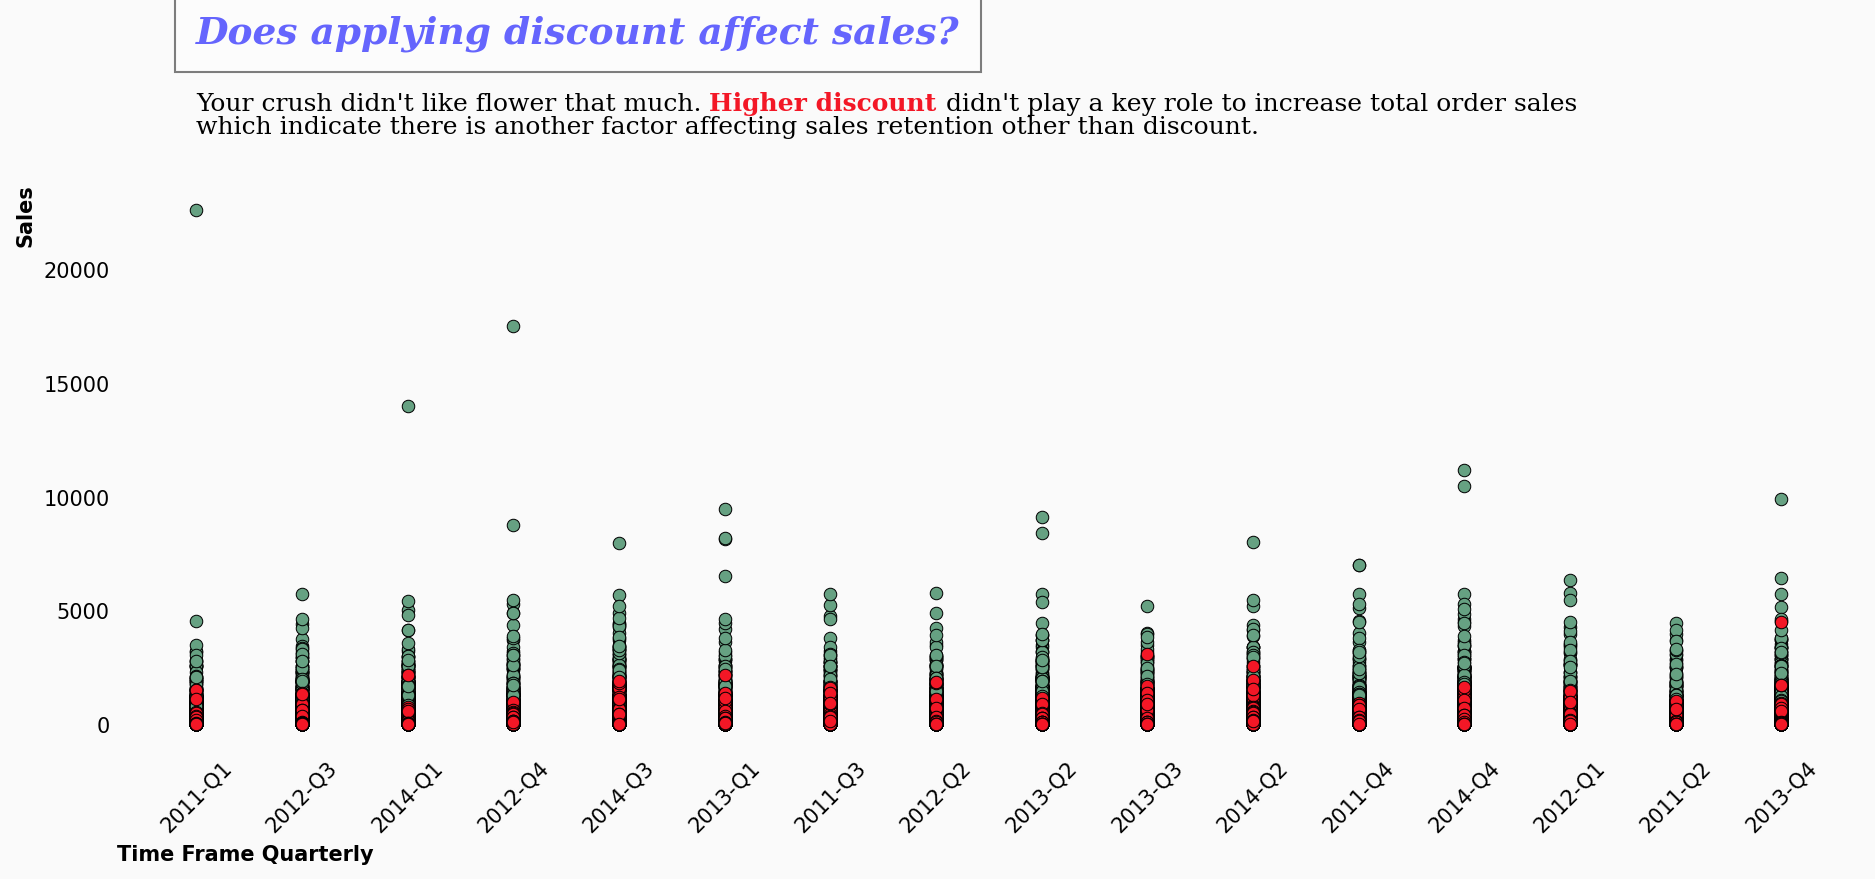

In [21]:
data_cohort['Quarterly Date'] = data_cohort['Order Date'].apply(lambda x: get_quarterly(x))
#data_cohort['Discount Size'] = data_cohort['Discount'].apply(lambda x: 1 if x > 0.5 else 0)

fig, ax = plt.subplots(1, 1, figsize = (15, 5), facecolor = '#fafafa', dpi = 150)

sns.scatterplot(data = data_cohort[data_cohort['Discount Dummy'] == 0], x = 'Quarterly Date', y = 'Sales', ec = 'black', 
                color = '#66a182', ax = ax)
sns.scatterplot(data = data_cohort[data_cohort['Discount Dummy'] == 1], x = 'Quarterly Date', y = 'Sales', ec = 'black',
               color = red, ax = ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis = u'both', which = u'both', length = 0)
ax.set_ylabel("Sales", loc = 'top', fontweight = 'bold')
ax.set_xlabel('Time Frame Quarterly', loc = 'left', fontweight = 'bold')
ax.set_xticklabels(data_cohort['Quarterly Date'].unique(), rotation = 45, fontsize = 10)

ax.set_facecolor('#fafafa')
ax.set_axisbelow(True)

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(0, 30000, "Does applying discount affect sales?", 
         fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'blue', 
             bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic', alpha = 0.6)
ax.text(4.85, 27000, "Higher discount", fontsize = 12, fontweight = 'bold',
        fontfamily = 'serif',color = red)
ax.text(0, 27000, "Your crush didn't like flower that much.", fontsize = 12, fontweight = 'light',
        fontfamily = 'serif',color = 'black')
ax.text(7.1, 27000, "didn't play a key role to increase total order sales", fontsize = 12, fontweight = 'light',
        fontfamily = 'serif',color = 'black')
ax.text(0, 26000, 'which indicate there is another factor affecting sales retention other than discount.', fontsize = 12, fontweight = 'light',
        fontfamily = 'serif',color = 'black')

plt.show()
#plt.savefig('5. Discount Performance.png', dpi=500, bbox_inches='tight')